In [1]:
from factory import Factory
from plotting import plot_factory
from time import time

import primitives as P

# Engine

LBU 0 None None
R=1; T=104.2
V= 8362
LBU 0 4181 8362
R=1; T=90.0
V= 4181
LBU 0 2090 4181
R=1; T=93.9
V= 2090
LBU 0 1045 2090
R=1; T=109.6
V= 1045
LBU 0 522 1045
R=1; T=72.2
V= 522
LBU 0 261 522
R=1; T=113.6
V= 261
LBU 0 130 261
R=1; T=88.2
V= 130
LBU 0 65 130
R=1; T=108.0
V= 65
LBU 0 32 65
R=-1; T=0.0
LBU 33 49 65
R=-1; T=0.0
LBU 50 57 65
R=-1; T=0.0
LBU 58 61 65
R=1; T=121.1
V= 61
LBU 58 59 61
R=-1; T=0.0
LBU 60 60 61
R=-1; T=0.0


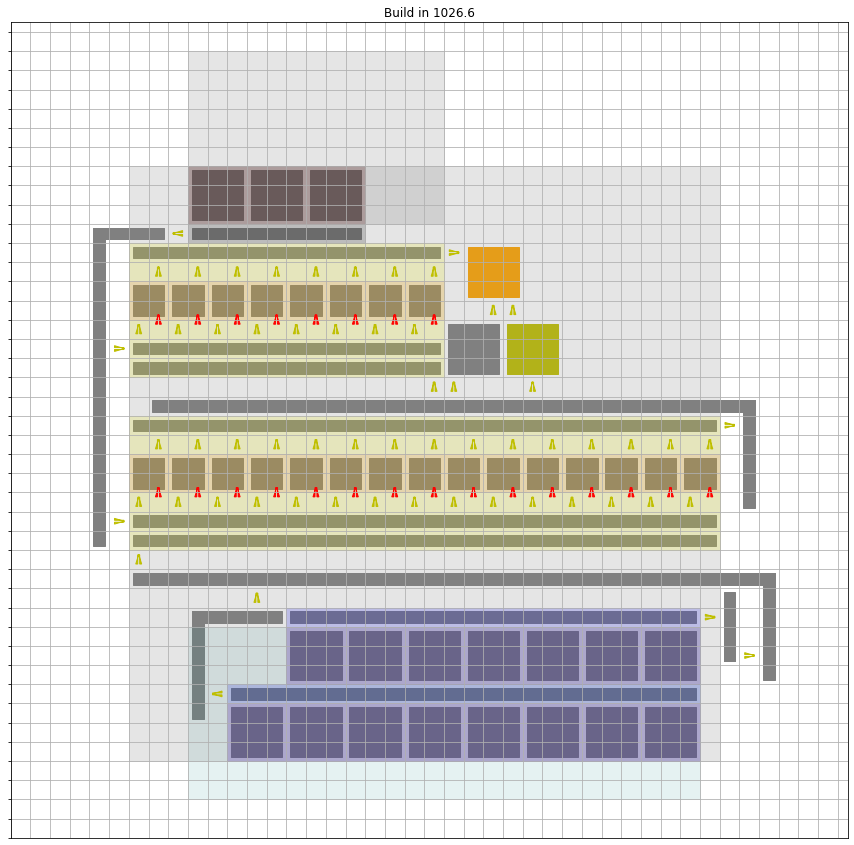

In [2]:
MAX_SEGS = 2
f = Factory()

coal_pos = P.Point2D(0,15)
iron_pos = P.Point2D(0,-15)

coal_area = f.new_area(coal_pos.as_tuple(), (coal_pos + (12,8)).as_tuple(), color='black', opacity=0.1)
iron_area = f.new_area(iron_pos.as_tuple(), (iron_pos + (25,8)).as_tuple(), color='teal', opacity=0.1)

coal_mine = f.new_production_line(num_machines=3, machine_size=3, num_inputs=0, auto_output=True, color='black')
f.add(coal_mine.machine_area.inside(coal_area))

iron_mine1 = f.new_production_line(num_machines=8, machine_size=3, num_inputs=0, auto_output=True, color='blue')
f.add(iron_mine1.machine_area.inside(iron_area))

iron_mine2 = f.new_production_line(num_machines=7, machine_size=3, num_inputs=0, auto_output=True, color='blue')
f.add(iron_mine2.machine_area.inside(iron_area))


iron_melt = f.new_production_line(num_machines=15, machine_size=2, num_inputs=2, auto_output=False, color='yellow')

b1 = f.new_segmented_belt(MAX_SEGS)
b2_1 = f.new_segmented_belt(MAX_SEGS)
b2_2 = f.new_segmented_belt(MAX_SEGS)
b2 = f.new_segmented_belt(MAX_SEGS)

f.connect_with_inserter(coal_mine.output(), b1)

f.connect_with_inserter(iron_mine1.output(), b2_1)
f.connect_with_inserter(iron_mine2.output(), b2_2)
f.connect_with_inserter(b2_1, b2)
f.connect_with_inserter(b2_2, b2)

f.connect_with_inserter(b1, iron_melt.input(0))
f.connect_with_inserter(b2, iron_melt.input(1))

b_iron_plate = f.new_segmented_belt(MAX_SEGS)
f.add(b_iron_plate.num_segs <= MAX_SEGS)
f.connect_with_inserter(iron_melt.output(), b_iron_plate)

tube_proc = f.new_machine(color='y')
gear_proc = f.new_machine(color='gray')

steel_melt = f.new_production_line(num_machines=8, machine_size=2, num_inputs=2, auto_output=False, color='yellow')
f.connect_with_inserter(b1, steel_melt.input(0))
f.connect_with_inserter(b_iron_plate, steel_melt.input(1))


engine_proc = f.new_machine(color='orange')
f.connect_with_inserter(b_iron_plate, tube_proc)
f.connect_with_inserter(b_iron_plate, gear_proc)
f.connect_with_inserter(gear_proc, engine_proc)
f.connect_with_inserter(tube_proc, engine_proc)
f.connect_with_inserter(steel_melt.output(), engine_proc)

metric = f.area.size.x + f.area.size.y

f.finalize_and_model(minimize_metric=metric)
plot_factory(f, size=(15,15), title=f'Build in {f.elapsed_time:0.1f}')